In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [99]:
XCols = train.drop(['Product_Supermarket_Sales','Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier'],axis=1)
YCols = train['Product_Supermarket_Sales']

Xtest = test.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier'],axis=1).copy()

In [100]:
train.columns

Index(['Product_Identifier', 'Product_Price', 'Product_Shelf_Visibility',
       'Product_Supermarket_Identifier', 'Product_Supermarket_Sales',
       'Product_Weight', 'Supermarket_Identifier',
       'Product_Visibility_MeanRatio', 'Supermarket_Years',
       'Product_Fat_Content_0', 'Product_Fat_Content_1',
       'Product_Fat_Content_2', 'Supermarket_Location_Type_0',
       'Supermarket_Location_Type_1', 'Supermarket_Location_Type_2',
       'Supermarket _Size_0', 'Supermarket _Size_1', 'Supermarket _Size_2',
       'Product_Type_Combined_0', 'Product_Type_Combined_1',
       'Product_Type_Combined_2', 'Supermarket_Type_0', 'Supermarket_Type_1',
       'Supermarket_Type_2', 'Supermarket_Type_3', 'Supermarket_0',
       'Supermarket_1', 'Supermarket_2', 'Supermarket_3', 'Supermarket_4',
       'Supermarket_5', 'Supermarket_6', 'Supermarket_7', 'Supermarket_8',
       'Supermarket_9'],
      dtype='object')

In [116]:
features = ['Supermarket_Type_3','Product_Price','Supermarket_Type_0']#,'Product_Weight','Product_Shelf_Visibility']
XXX = train[features]
yyy = test[features]

In [117]:
XXX.head()

,Supermarket_Type_3,Product_Price,Supermarket_Type_0
0,0,357.54,1
1,0,355.79,0
2,0,350.79,0
3,0,355.04,0
4,0,354.79,0


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XXX, YCols, test_size=0.3, random_state=0)

In [104]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(3493,)
(3493, 7)
(1497,)
(1497, 7)


In [64]:
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=0.05)

ada.fit(X_train, y_train)

yy_pred = ada.predict(X_test)
print(metrics.mean_squared_error(y_true=y_test, y_pred=yy_pred))
print(r2_score(y_test, yy_pred))

8814712.132613746
0.5471382486521958


In [65]:
from sklearn import linear_model

Ridge = linear_model.Ridge(random_state=10,normalize=True,alpha=.001)
Ridge.fit(X_train,y_train)

#print(Ridge.intercept_)
coef1 = pd.DataFrame(Ridge.coef_,features,columns=["Value"])

#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)
y_predicted = Ridge.predict(X_test)

print(metrics.mean_squared_error(y_true=y_test, y_pred=y_predicted))
print(r2_score(y_test, y_predicted))

8813180.492575089
0.5472169376870623


In [86]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train,y_train)

dt.score(X_train, y_train)
#pred1 = dt.predict(X_test)
#print(metrics.mean_squared_error(y_true=y_test, y_pred=pred1))
#print(r2_score(y_test, pred1))

0.5180779792497423

In [112]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Predicted Data
print("Predicted Output Values")
print(y_pred)

Predicted Output Values
[6735.56056275 5553.01037706 6153.42391172 ... -255.12570458 4397.57791381
 5856.55011797]


In [119]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [120]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X_train, y_train, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


4109.298081028197

In [121]:
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Text(0,0.5,'RMSE (lower is better)')

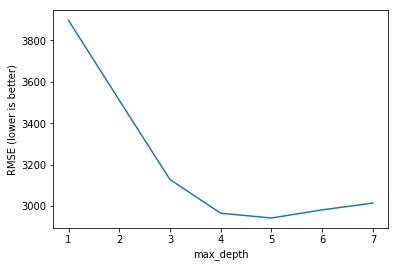

In [122]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [123]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [124]:
treereg.feature_importances_

array([0.17001134, 0.42548314, 0.40450553])

In [125]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'importance':treereg.feature_importances_})

,importance
0,0.170011
1,0.425483
2,0.404506


In [126]:
treereg = treereg.predict(yyy)

In [127]:
len(yyy)

3532

In [128]:
yyy.shape

(3532, 3)

In [129]:
tree_reg = pd.DataFrame({'Product_Supermarket_Identifier':test['Product_Supermarket_Identifier'],
                                  'Product_Supermarket_Sales': treereg},
                                 columns=['Product_Supermarket_Identifier','Product_Supermarket_Sales'])

#to csv
tree_reg.to_csv('dtr6.csv',index=False)

Linear model, coefficients:  [ 1.50031418e+01 -1.76346347e+03  1.41649389e+00  4.05051109e+02
  1.88704555e+01 -1.00433041e+02 -6.06947683e+01  1.61127809e+02
 -8.67047361e+02  5.74599650e+02  2.92447711e+02 -4.91860277e+02
  1.13213047e+03 -6.40270191e+02  2.02920199e+01  4.04027483e+01
 -6.06947683e+01 -2.38032239e+03  1.03273586e+03 -6.27879125e+02
  1.97546566e+03 -5.63278547e+02 -4.91860277e+02  3.63332005e+02
 -6.27879125e+02 -1.81704385e+03  1.97546566e+03  4.01335232e+02
 -1.90067587e+02  1.16545255e+03 -2.15456068e+02]
Mean squared error (dummy): 19465207.47
Mean squared error (linear model): 8633133.16
r2_score (dummy): -0.00
r2_score (linear model): 0.56


ValueError: x and y must be the same size

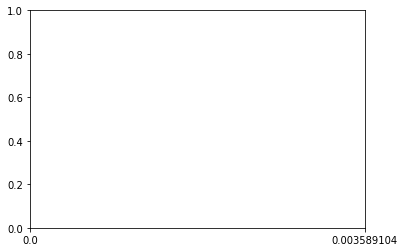

In [39]:
# Regression evaluation metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
%matplotlib inline

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()